# Waste Management using CNN Model

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing necessary libraries

import numpy as np #data processing
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data visualization
import cv2 #OpenCV (Open Source Computer Vision Library), for image processing
from tqdm import tqdm #progress bars, easy to track execution progress.
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path = "dataset/TRAIN" 
test_path = "dataset/TEST"

In [3]:
# pip install tensorflow

In [13]:
#importing libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
# Data preparation and visualization

x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████████████████████████████████████████████████████████████████████████| 9999/9999 [01:47<00:00, 93.07it/s]


In [6]:
data.shape

(22564, 2)

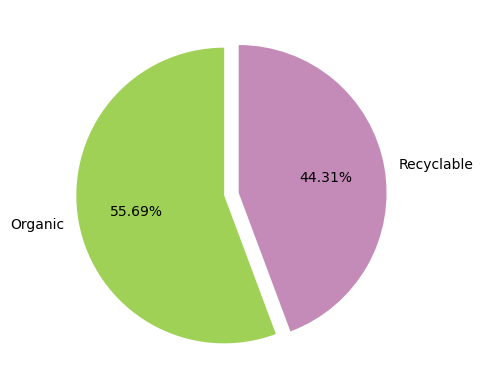

In [10]:
# Visualization of class distribution

colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

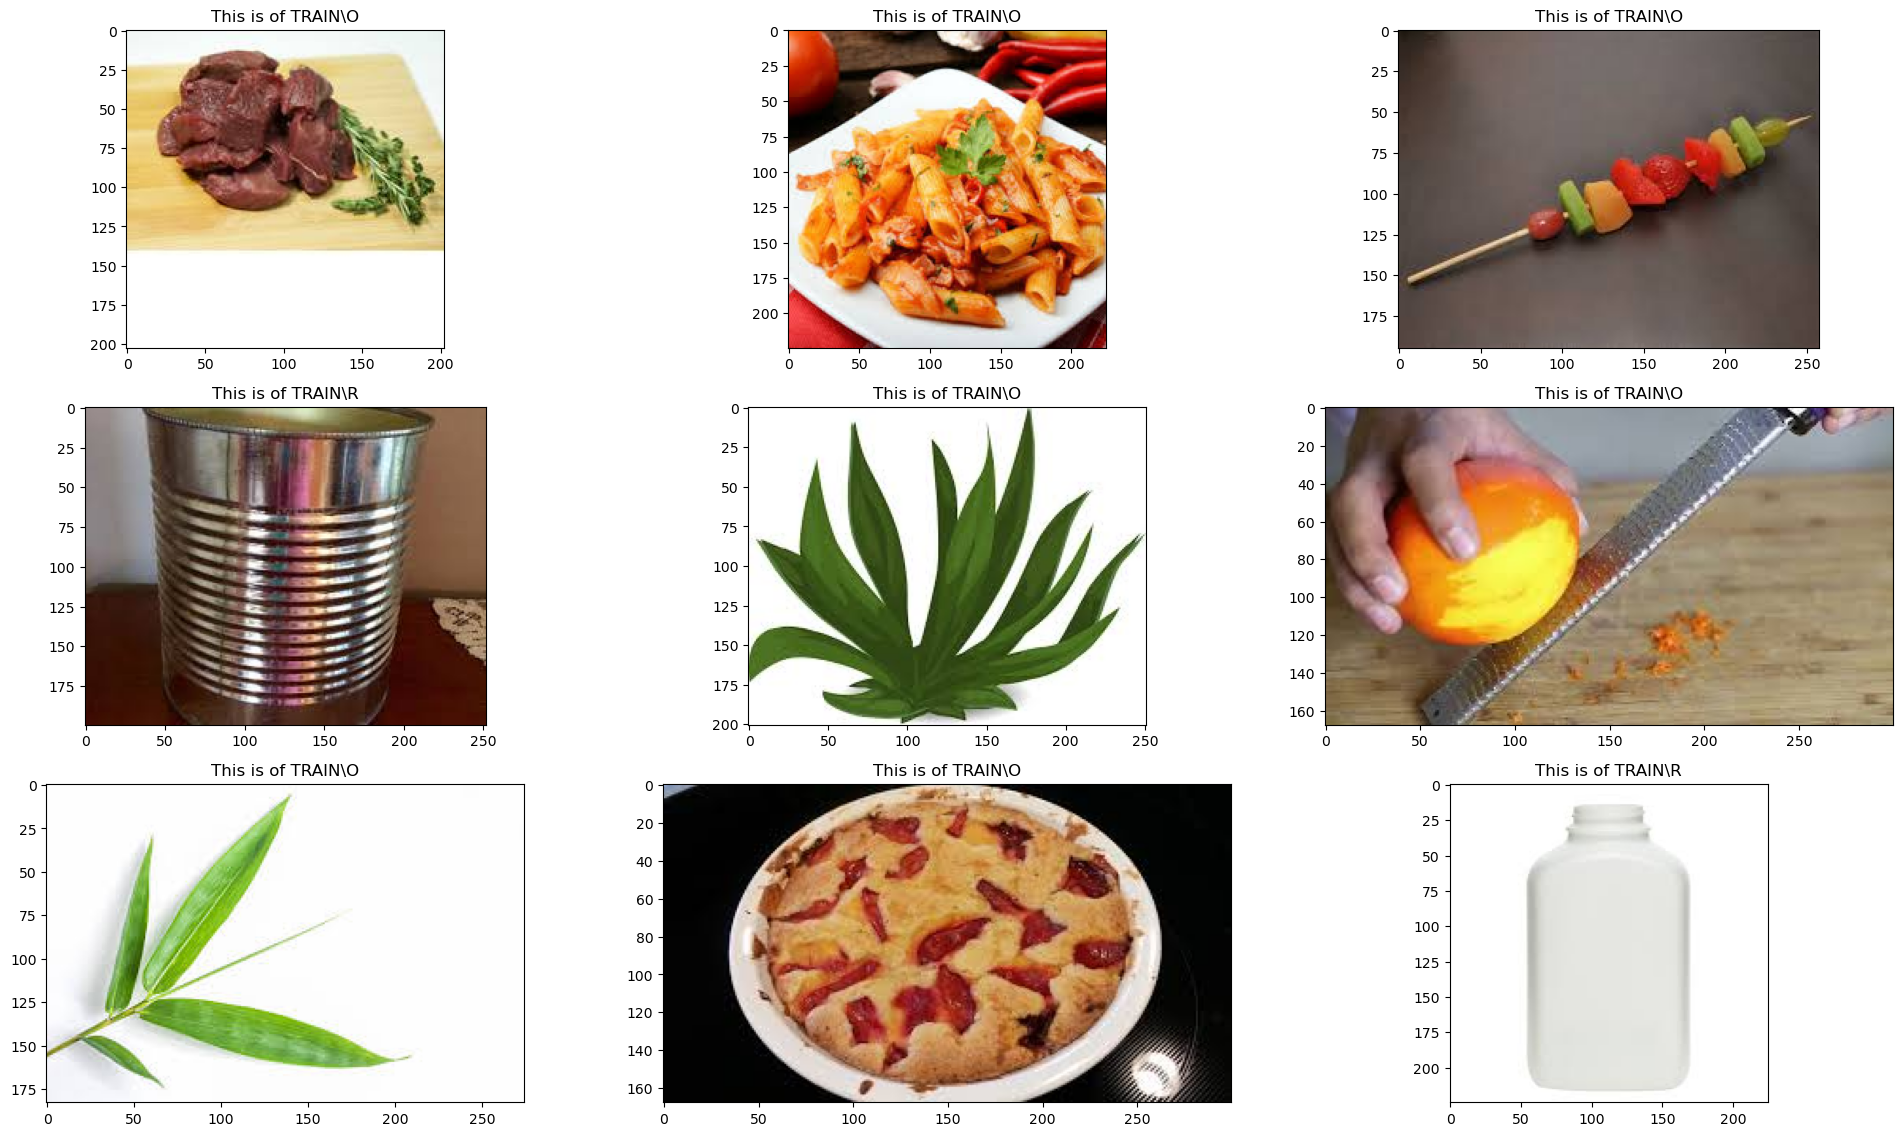

In [12]:
# Displaying random sample images

plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN- Convolutional Neural Network

In [14]:
#Convolutional Neural Network (CNN) model built using TensorFlow/Keras for image classification
# Build the CNN model
model = Sequential()

# Convolutional layers with MaxPooling and ReLU activation
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Flatten the data
model.add(Flatten())

# Dense layers with Dropout to prevent overfitting
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [15]:
# Print model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Data augmentation for the training set

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
# Data scaling for the test set

test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
#Keras ImageDataGenerator to create data generators for training and testing a CNN with images

train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
# Early stopping callback to stop training if the validation accuracy does not improve

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
hist = model.fit(
    train_generator, 
    epochs=15, # Number of times the model sees the entire dataset
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1665s 5s/step - accuracy: 0.7474 - loss: 0.5605 - val_accuracy: 0.8365 - val_loss: 0.3649
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1646s 5s/step - accuracy: 0.8140 - loss: 0.4375 - val_accuracy: 0.8452 - val_loss: 0.3674
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1486s 4s/step - accuracy: 0.8324 - loss: 0.4025 - val_accuracy: 0.8408 - val_loss: 0.3910
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1333s 4s/step - accuracy: 0.8344 - loss: 0.3903 - val_accuracy: 0.8603 - val_loss: 0.3522
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1583s 4s/step - accuracy: 0.8527 - loss: 0.3657 - val_accuracy: 0.8862 - val_loss: 0.3049
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1677s 5s/step - accuracy: 0.8518 - loss: 0.3615 - val_accuracy: 0.8587 - val_loss: 0.3490
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1279s 4s/step - accuracy: 0.8567 - loss: 0.3548 - val_accuracy: 0.8826 - val_loss: 0.2898
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 1371s 4s/step - accuracy: 0.8649 - loss: 0.3406 - 

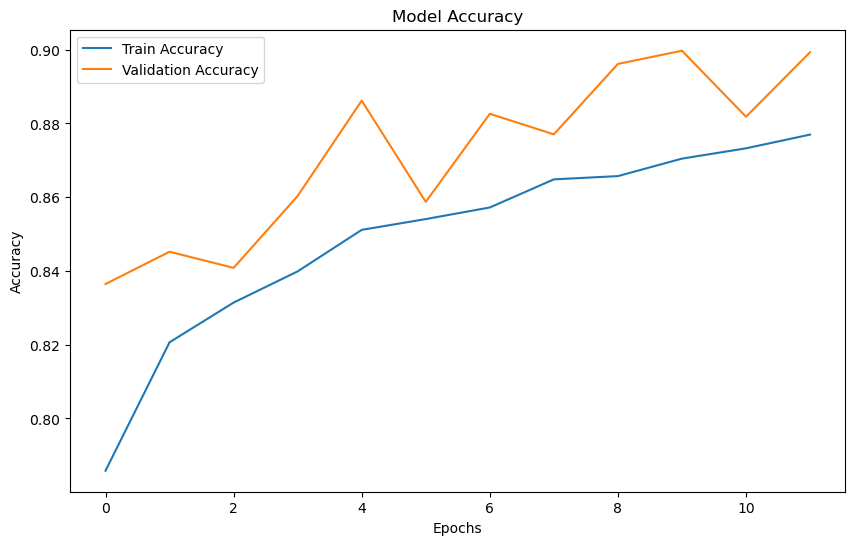

In [21]:
# Visualize training and validation accuracy

plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

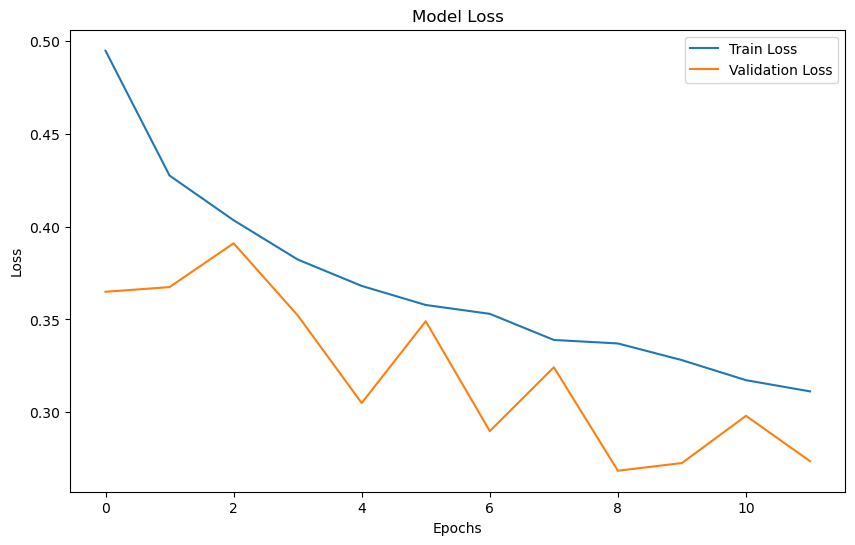

In [22]:
# Visualize training and validation loss

plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Save the trained model 

model.save('wc_model.keras')

In [25]:
# Define the function to predict and visualize results on new images

def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
The image shown is Organic Waste


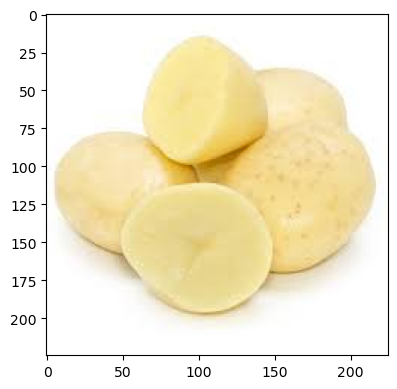

In [31]:
# Example of using the model to predict an image

test_img = cv2.imread('D:\Green Skills AI SHELL\WASTE CLASSIFICATION\DATASET\TEST\O\O_12976.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The image shown is Organic Waste


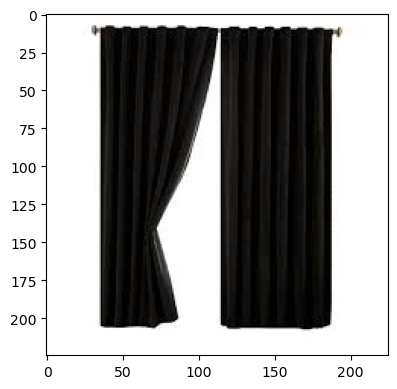

In [29]:
test_img = cv2.imread('D:\Green Skills AI SHELL\WASTE CLASSIFICATION\DATASET\TEST\R\R_10050.jpg')
predict_fun(test_img)